Simple workbook to visualize percolations

https://www.youtube.com/watch?v=a-767WnbaCQ

# CAN INSTEAD USE A UNION FIND DATA STRUCTURE TO IMPROVE SPEED

Find: Return the id of the component to which the given site is a member
Union: Connect two sites by combining their two components into a single component with the same id


Abbreviated Proof:
- Note: lg = log base 2
- For a given node x, its depth in the tree will increase by 1 when its tree T1 is merged into another tree T2.
- When this happens, the size of x's tree will at least double, because our union operation requires size(T2) > size(T1) for T1 to point to T2.
- Through any number of union operations, the size of x's tree can double at most lg(N) times [ lg(2^N) = N ], and N is the total number of nodes.
- Therefore: Traversals take O(nlg(n)) in the worst case



In [1]:
# need a way to visualize hte grid of pipes - image each corner is the center of a pixel

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la


#grid must be a rectangle
# stats with simplest box = n = 4 e = 4
# each dimension you add you add n nodes and 2n-1 edges
# simplest is actually just one node adn rule still holds 
# (x-1)+(2x-1)(y-1) is the equation for the number of edges in a grid of x by y nodes


#generate a representation of edges


#percolate through the "graph" to find un-connected nodes
#the edge nodes ar emessing me up





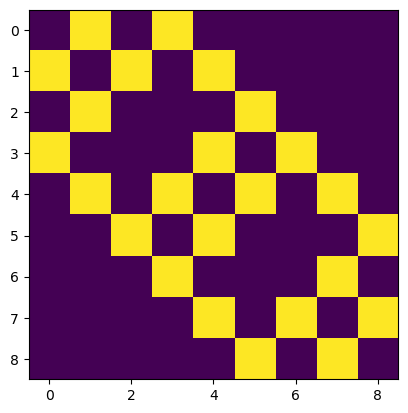

In [2]:
#maybe better to list of nodes and work from there
x = 3 
y = 3
def generate_edges(x,y):
    nodes = np.arange(x*y)
    edges = np.zeros((len(nodes),len(nodes)))

    #node n will be connected to nodes (if they exist) n-1, n+1 , n-x, n+x where x is the number of nodes in a row
    for n in nodes:
        for i in [-1,1]:
            if n+i >= (n//x)*x and n+i < ((n//x)+1)*x:  #check horizontal contrains e.g. if spilling over to next row - vertical contrains will be an index error (could check and then avoid the try except)
                try:
                    edges[n,n+i] = 1
                except:
                    pass
        for i in [-x,x]:
            if n+i >= 0 and n+i < len(nodes):  #check horizontal contrains e.g. if spilling over to next row - vertical contrains will be an index error (could check and then avoid the try except)
                try:
                    edges[n,n+i] = 1
                except:
                    pass

    # BECAUSE I AM DELETING THE NODES I GO THROUGH I CAN'T MAKE THIS ONE DIRECTIONAL
    # Becuase if node 5 conencts to node 0 then node 0 will get deleted before node 5s conncetions are checked
    #edges = np.triu(edges)
    return edges

edges = generate_edges(x,y)
plt.imshow(edges)


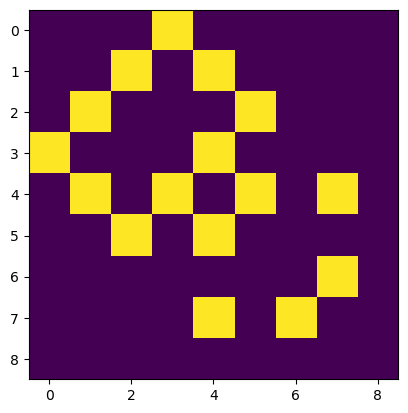

In [3]:
#bernoulli test is easy
#

def bernoulli_edge_matrix(edges,p,seed = 10):
    np.random.seed(seed)
    bernoulli_matrix = np.array(np.random.uniform(0,1,(edges.shape)) > p,dtype=int)
    bernoulli_matrix = np.triu(bernoulli_matrix)
    bernoulli_matrix = bernoulli_matrix + bernoulli_matrix.T
    #plt.imshow(bernoulli_matrix)
    #slightly harder due to the fact that we need to keep both edges

    #simply use an and
    perc_edges = edges * bernoulli_matrix
    return(perc_edges)
    
perc_edges = bernoulli_edge_matrix(edges,0.5)
plt.imshow(perc_edges)


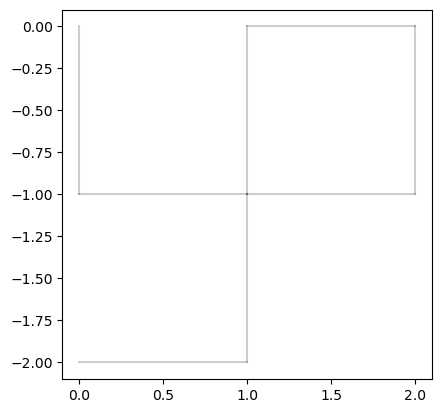

In [4]:
# display edges
def display_edges(edges,x,y):
    edge_tuples = np.argwhere(edges == 1)

    #print(edge_tuples)
    start_x = edge_tuples[:,0] % x
    start_y = -(edge_tuples[:,0] // x)

    end_x = edge_tuples[:,1] % x
    end_y = -(edge_tuples[:,1] // x)

    #if you just feed one array in in takes the index's as the x
    # plt.plot(np.array([[0,1,3],
    #                    [1,3,5]]),
    #         np.array([[0,3,3],
    #                    [1,3,5]]))
    plt.plot(np.array([start_x,end_x]),np.array([start_y,end_y]),c = "black",alpha = 0.1)
    
    border = 0.1
    plt.xlim(0-border,x-1+border)
    plt.ylim(-y+1-border,0+border)
    plt.gca().set_aspect('equal')

plt.show()

display_edges(perc_edges,x,y)

In [5]:
#brute force percolation
def get_groups(edges,debug = False):
    #copy for safety
    edges = edges.copy()
    groups = []
    while np.sum(edges) > 0:
        #print("start")
        #print(edges)
        #find first "node" that has at least one edge
        start_node = np.argwhere(np.sum(edges,axis=1) > 0)[0][0]
        #recursive seach
        group = find_connected_nodes(start_node,edges,debug)
        #print(group)
        group = np.unique(np.array(group))
      
        groups.append(group)
        #print(f"finished one loop {edges}")

    groups = sorted(groups, key=lambda x: len(x),reverse=True)
    return groups

# Flatten a nested list
def flatten_list(nested_list):
    flattened_list = []
    for sublist in nested_list:
        if isinstance(sublist, list):
            flattened_list.extend(flatten_list(sublist))
        else:
            flattened_list.append(sublist)
    return flattened_list
# Flatten the edge_tuples array
#flattened_edge_tuples = flatten_list(edge_tuples.tolist())

def dprint(y,x):
    if y:
        print(x)


def find_connected_nodes(node,edges,debug = False):
    dprint(debug,f"recursive call: {node}")
    connected_nodes = []
    connections = np.argwhere(edges[node,:] == 1)
    dprint(debug,f"connections: {connections}")
    #dprint(debug,f"pre{edges}")

    #clear all connections from node n
    edges[node,:] = edges[node,:]*0

    #clear all connecitons to node n (same thing)
    edges[:,node] = edges[:,node]*0

    #clear all connectons to each identified connections but keep the connections from them
    edges[:,connections] = edges[:,connections]*0
   
    #dprint(debug,f"post{edges}")

    if len(connections) == 0:
        dprint(debug,f"node base case: {node}")
        return node
    else:
        connected_nodes.append(node)
        for i in connections:
            edges[node,:] = edges[node,:]*0
            dprint(debug,f"node search: {i.item()}")
            connected_nodes.append(find_connected_nodes(i.item(),edges,debug))
    return flatten_list(connected_nodes)

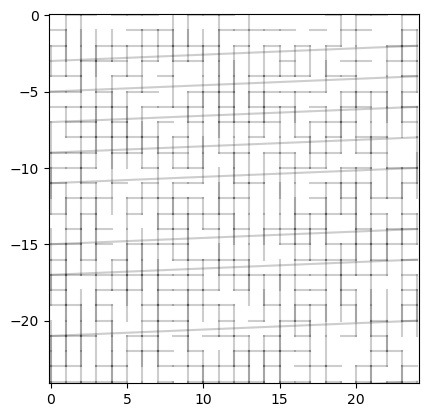

In [43]:
display_edges(perc_edges,x,y)

prop_cycle = plt.rcParams['axes.prop_cycle']
default_colors = prop_cycle.by_key()['color']
extended_colors = default_colors * (1001 // len(default_colors)) + default_colors[:1001 % len(default_colors)]
extended_colors

def display_groups(groups,x,y,colors = extended_colors):
    for i,group in enumerate(groups):
        plt.scatter(group % x,-(group // x),s = 650/x,marker="s",color = colors[i])

#plt.show()

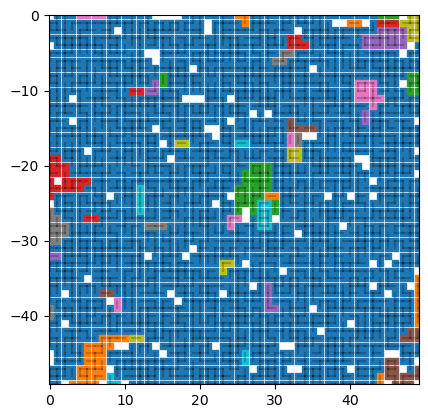

In [39]:
x = 50
y = 50
p = 0.45
seed = 10
debug = False
edges = generate_edges(x,y)
perc_edges = bernoulli_edge_matrix(edges,p,seed)
display_edges(perc_edges,x,y)
groups = get_groups(perc_edges,debug)
display_groups(groups,x,y)


In [9]:
# x = 50
# y = 50
# p = 0.45
# seed = 10
# debug = False


# display_groups(groups,x,y)

# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# # Create a figure and axis
# fig, ax = plt.subplots()

# # Set the axis limits
# ax.set_xlim(0, x-1)
# ax.set_ylim(-y+1, 0)

# # Create an empty scatter plot
# scatter = ax.scatter([], [])

# # Update function for each frame
# def update(frame):
#     # Clear the previous scatter plot
#     scatter.remove()

#     edges = generate_edges(x,y)
#     perc_edges = bernoulli_edge_matrix(edges,p,seed)
#     #display_edges(perc_edges,x,y)
#     groups = get_groups(perc_edges,debug)

#     # Get the group for the current frame
#     current_group = groups[frame]

#     # Get the x and y coordinates for the current group
#     x_coords = current_group % x
#     y_coords = -(current_group // x)

#     # Update the scatter plot with the new coordinates
#     scatter = ax.scatter(x_coords, y_coords, s=1000/x, marker="s")

#     # Return the scatter plot
#     return scatter,

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames=len(groups), interval=200)

# # Save the animation as an mp4 file
# ani.save('scatter_animation.mp4', writer='ffmpeg')

# # Display the animation
# plt.show()

MovieWriter Pillow unavailable; using Pillow instead.


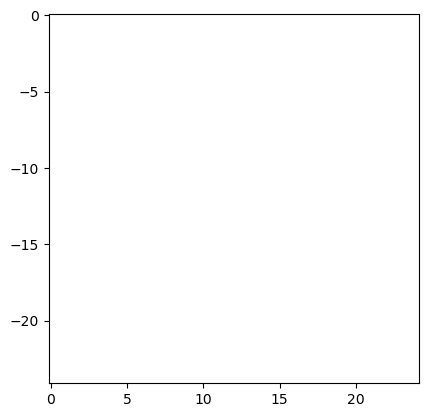

In [44]:
import celluloid
from celluloid import Camera

x = 25
y = 25

# Create a figure and axis
fig, ax = plt.subplots()

# Create a Camera object
camera = Camera(fig)

# Define a function to generate each frame of the animation
def generate_frame(frame):
    # Write your code here to generate the figure for each frame
    # Make sure to include plt.show() at the end of the function

    p = frame
    seed = 10
    debug = False
    edges = generate_edges(x,y)
    perc_edges = bernoulli_edge_matrix(edges,p,seed)
    display_edges(perc_edges,x,y)
    groups = get_groups(perc_edges,debug)
    display_groups(groups,x,y)
    
    # Capture the current figure using the Camera object
    camera.snap()

# Call the generate_frame() function for each frame of the animation
# You can modify the range() function to control the number of frames
for frame in np.linspace(0,1,100):
    generate_frame(frame)

# Create the animation using the captured frames
animation = camera.animate()

# Display the animation
animation.save('PERCOLATION.gif', writer='Pillow')